## Amazon Business Research Analyst Challenge

### Gender Neutrality and Inclusion

##### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### Reading Train Data

In [2]:
train_data = pd.read_csv('C:/Users/Satyam/Downloads/AmazonBR/Train.csv')
train_data.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [3]:
train_data.describe()

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,13150.781239,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021,75.880093
std,6475.019626,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836,14.894207
min,2001.000000,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000,33.530000
25%,7501.000000,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000,68.720000
50%,13173.000000,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000,78.110000
75%,18718.000000,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000,87.990000
max,24390.000000,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000,95.500000


##### Checking For Missing Values Column Wise

In [4]:
train_data.isnull().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

##### As we can observer that there is no missing data or values except Bias Influential Factor. Hence, we will fill the missing values using Backward Filling technique i.e. Selecting the immediate next valid value in the column and placing it in the NaN value position for each row and Check again for any Missing Values

In [5]:
train_data.bfill(inplace = True)
train_data.isnull().sum()

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
BiasInfluentialFactor      0
FitmentPercent             0
dtype: int64

##### Now Checking the Data-Types of the columns in order to identify the Categorical Variables or Columns

In [6]:
train_data.dtypes

EmpID                        int64
EmpName                     object
LanguageOfCommunication     object
Age                          int64
Gender                      object
JobProfileIDApplyingFor     object
HighestDegree               object
DegreeBranch                object
GraduatingInstitute         object
LatestDegreeCGPA             int64
YearsOfExperince             int64
GraduationYear               int64
CurrentCTC                   int64
ExpectedCTC                  int64
MartialStatus               object
EmpScore                     int64
CurrentDesignation          object
CurrentCompanyType          object
DepartmentInCompany         object
TotalLeavesTaken             int64
BiasInfluentialFactor       object
FitmentPercent             float64
dtype: object

##### Filtering out all the Categorical Columns having Data-types as 'object'

In [7]:
obj_cols = [i for i in train_data.columns if train_data[i].dtypes == 'object']
obj_cols

['EmpName',
 'LanguageOfCommunication',
 'Gender',
 'JobProfileIDApplyingFor',
 'HighestDegree',
 'DegreeBranch',
 'GraduatingInstitute',
 'MartialStatus',
 'CurrentDesignation',
 'CurrentCompanyType',
 'DepartmentInCompany',
 'BiasInfluentialFactor']

##### Checking the values of Target Variable Bias Influential Factor in Train Data and visualizing the Data

In [8]:
train_data['BiasInfluentialFactor'].value_counts()

DegreeBranch          3801
Gender                3407
YearsOfExperince      2085
CurrentCompanyType    1537
EmpScore               877
HighestDegree          766
Ethinicity             435
MartialStatus          379
LatestDegreeCGPA       358
Name: BiasInfluentialFactor, dtype: int64

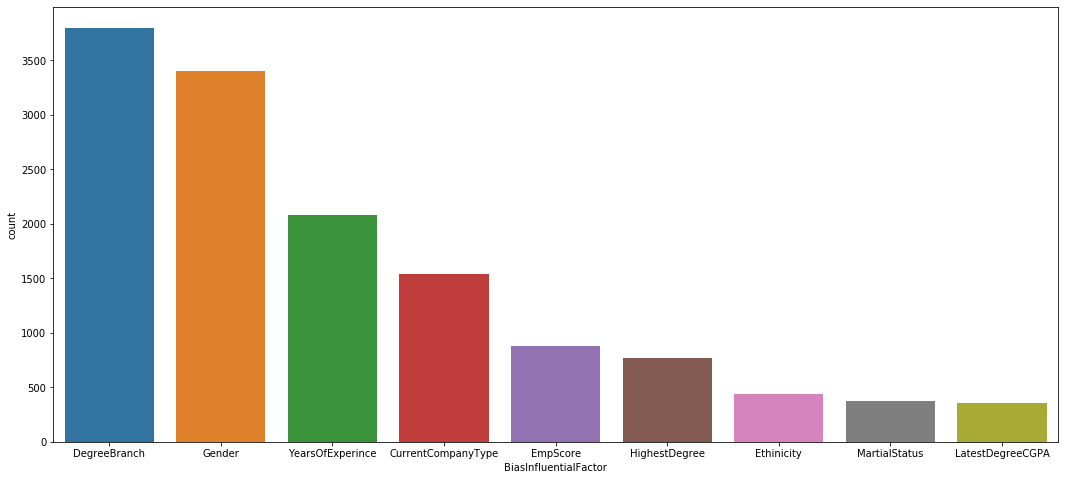

In [9]:
%matplotlib inline

plt.figure(figsize = (18,8))
sns.countplot(x=train_data['BiasInfluentialFactor'],
              data = train_data,
              order = train_data['BiasInfluentialFactor'].value_counts().index)

plt.show()

##### Filtering the data to Find Bias Factor  on every 5% Fitment gap from 50 to 100  and identifying the top 2 Bias Influential Factor and Job ID, and creating a list of Bias_Factor of each interval

In [10]:
Bias_Factor_List = []

for i in range(50,101,5):
    train_data_less_fit = train_data[train_data['FitmentPercent'] < i]
    Bias_Factor_List.append([i,
                             train_data_less_fit['BiasInfluentialFactor'].value_counts().index[0],
                             train_data_less_fit['BiasInfluentialFactor'].value_counts().index[1],
                             train_data_less_fit['JobProfileIDApplyingFor'].value_counts().index[0],
                             train_data_less_fit['JobProfileIDApplyingFor'].value_counts().index[1]])
Bias_Factor_List = pd.DataFrame(Bias_Factor_List,columns = ['Fitment%','Bias Factor1','Bias Factor2','JobID1','JobID2'])
Bias_Factor_List

,Fitment%,Bias Factor1,Bias Factor2,JobID1,JobID2
0,50,DegreeBranch,Gender,JR85289,JR87525
1,55,DegreeBranch,Gender,JR85289,JR87525
2,60,DegreeBranch,Gender,JR85289,JR87525
3,65,DegreeBranch,CurrentCompanyType,JR85289,JR87525
4,70,CurrentCompanyType,DegreeBranch,JR85289,JR87525
5,75,DegreeBranch,Gender,JR85289,JR87525
6,80,Gender,DegreeBranch,JR85289,JR87525
7,85,Gender,DegreeBranch,JR85289,JR87525
8,90,Gender,DegreeBranch,JR85289,JR87525
9,95,DegreeBranch,Gender,JR85289,JR87525


In [11]:
train_data_less_fit = train_data[train_data['FitmentPercent'] < 70]
train_data_less_fit.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,Gender,67.09
6,16554,Joseph,Hindi,31,Male,JR85289,PhD,Computer Science,Tier 1,7,...,12,21,Single,3,SDE,Enterprise,Customer Success,8,CurrentCompanyType,62.29
10,24117,Edward,Hindi,29,Male,JR85289,B.Tech,Artificial Intelligence,Tier 1,7,...,9,16,Married,3,EM,Enterprise,Finance,6,MartialStatus,56.85
12,12056,Walter,English,30,Male,JR85289,M.Tech,Computer Science,Tier 2,7,...,12,16,Single,4,SSE,Enterprise,Design,5,CurrentCompanyType,60.85
13,23265,Arthur,Hindi,27,Male,JR85289,B.Tech,Computer Science,Tier 1,5,...,17,26,Married,2,EM,Enterprise,Engineering,20,YearsOfExperince,41.99


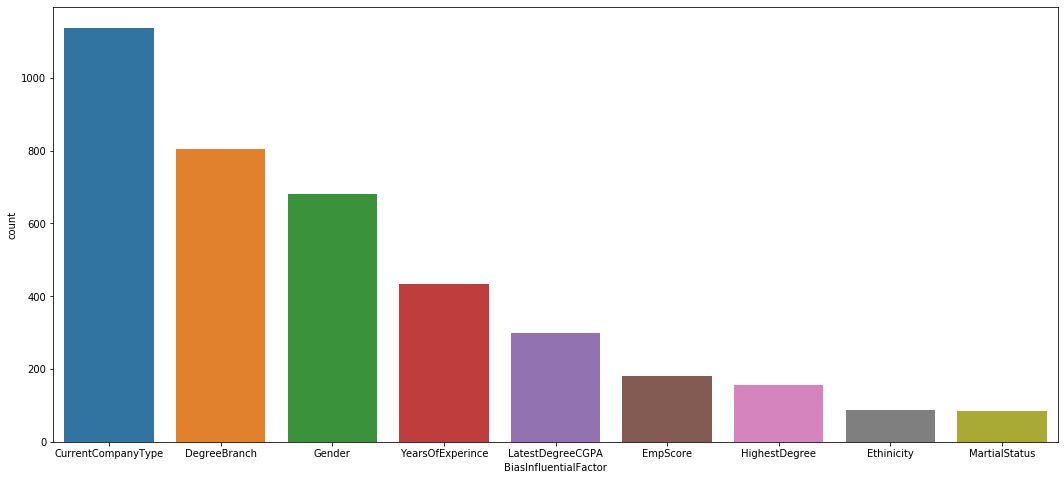

In [12]:
%matplotlib inline

plt.figure(figsize = (18,8))
sns.countplot(x=train_data_less_fit['BiasInfluentialFactor'],
              data = train_data_less_fit,
             order = train_data_less_fit['BiasInfluentialFactor'].value_counts().index)

plt.show()

##### Converting the Categorical Variable into Numerical by using Label Encoder in order to process it through the Learning Model and fitting purpose and dropping un-necessary columns like EmpID and EmpName

In [13]:
train_df = train_data.copy()

In [14]:
for col in obj_cols:
    train_df[col] = LabelEncoder().fit_transform(train_data[col])
train_df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,988,0,35,1,3,0,2,0,7,...,21,26,0,5,7,0,1,20,8,95.40
1,15079,1728,0,26,1,4,0,0,2,7,...,15,19,0,5,0,1,2,6,4,67.09
2,18638,952,0,36,0,4,7,1,0,6,...,15,24,1,5,5,1,2,19,4,91.26
3,3941,345,0,29,0,4,1,5,1,5,...,16,24,0,5,5,2,4,16,4,72.29
4,5936,753,0,25,1,0,2,1,2,8,...,24,32,0,5,5,0,2,10,1,86.34


##### Setting Training Columns and Target Columns in Train Data

In [15]:
y=train_df[['BiasInfluentialFactor','FitmentPercent']]
y.head()

,BiasInfluentialFactor,FitmentPercent
0,8,95.40
1,4,67.09
2,4,91.26
3,4,72.29
4,1,86.34


In [16]:
x=train_df[['LanguageOfCommunication', 'Age', 'Gender','JobProfileIDApplyingFor', 
        'HighestDegree', 'DegreeBranch','GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,0,35,1,3,0,2,0,7,12,2009,21,26,0,5,7,0,1,20
1,0,26,1,4,0,0,2,7,3,2018,15,19,0,5,0,1,2,6
2,0,36,0,4,7,1,0,6,6,2015,15,24,1,5,5,1,2,19
3,0,29,0,4,1,5,1,5,6,2015,16,24,0,5,5,2,4,16
4,0,25,1,0,2,1,2,8,2,2019,24,32,0,5,5,0,2,10


##### Splitting Data into Train Test for Model Training and Training the Model using Random Forest Regressor for predicting the Future Bias Factor and Fitment %

In [17]:
train_X, val_X, train_y, val_y = train_test_split(x, y,random_state = 2)

In [18]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)
print("MAE: ",mean_absolute_error(val_y, preds))

MAE:  4.347445882180553


##### As we can se that, Mean Absolute Error has been around 5%, we can move on predicting Data on our Test Data and generate a file on it.

In [19]:
test_data = pd.read_csv('C:/Users/Satyam/Downloads/AmazonBR/Test.csv')

test_df = test_data[['LanguageOfCommunication', 'Age', 'Gender','JobProfileIDApplyingFor', 
        'HighestDegree', 'DegreeBranch','GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]


for col in obj_cols:
    if(col not in ['BiasInfluentialFactor','EmpID','EmpName']):
        test_df[col] = LabelEncoder().fit_transform(test_data[col])

#Predicting Data
test_pred = forest_model.predict(test_df)

#Converting Prediction Data into a List
test_pred = test_pred.tolist()

In [20]:
#Converting Bias Factor from Encoding to Original Value
for i in test_pred:
    i[0] = (round(i[0]))
    i[1] = round(i[1],2)
    if(i[0] == 0):
        i[0] = 'CurrentCompanyType'
    if(i[0] == 1.0):
        i[0] = 'DegreeBranch'
    if(i[0] == 2):
        i[0] = 'EmpScore'
    if(i[0] == 3):
        i[0] = 'Ethinicity'
    if(i[0] == 4):
        i[0] = 'Gender'
    if(i[0] == 5):
        i[0] = 'HighestDegree'
    if(i[0] == 6):
        i[0] = 'LatestDegreeCGPA'
    if(i[0] == 7):
        i[0] = 'MartialStatus'
    if(i[0] == 8):
        i[0] = 'YearsOfExperince'


test_pred_df = pd.DataFrame(test_pred,columns = ['BiasInfluentialFactor', 'FitmentPercent'])
test_pred_df.head()

#Converting Final DataFrame with EmpID and Predicted Data
test_pred_final = pd.concat([test_data['EmpID'],test_pred_df],axis=1)
test_pred_final

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,DegreeBranch,90.96
1,23568,DegreeBranch,90.03
2,21490,HighestDegree,81.87
3,8363,EmpScore,54.78
4,6165,Gender,79.70
...,...,...,...
8740,14758,Gender,79.17
8741,23544,Gender,80.58
8742,16175,EmpScore,80.33
8743,18458,EmpScore,52.80


##### Writing final prediction to the CSV File

In [21]:
test_pred_final.to_csv('C:/Users/Satyam/Downloads/AmazonBR/Sample.csv',header = True,index = False)

Sample = pd.read_csv('C:/Users/Satyam/Downloads/AmazonBR/Sample.csv')
Sample.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,DegreeBranch,90.96
1,23568,DegreeBranch,90.03
2,21490,HighestDegree,81.87
3,8363,EmpScore,54.78
4,6165,Gender,79.70


## Conclusion

### On the basis of the above data, we identified a List of Top 2 Bias Influential Factor and Job ID in respect to the Fitment%. From this List or Table, we can focus on those JobIDs which are not getting Employees with any threshold Fitment % and also address the problem the Bias Factor which is resulting the former result of not achieving the benchmark of Fitment % as set by the company.

In [23]:
Bias_Factor_List

,Fitment%,Bias Factor1,Bias Factor2,JobID1,JobID2
0,50,DegreeBranch,Gender,JR85289,JR87525
1,55,DegreeBranch,Gender,JR85289,JR87525
2,60,DegreeBranch,Gender,JR85289,JR87525
3,65,DegreeBranch,CurrentCompanyType,JR85289,JR87525
4,70,CurrentCompanyType,DegreeBranch,JR85289,JR87525
5,75,DegreeBranch,Gender,JR85289,JR87525
6,80,Gender,DegreeBranch,JR85289,JR87525
7,85,Gender,DegreeBranch,JR85289,JR87525
8,90,Gender,DegreeBranch,JR85289,JR87525
9,95,DegreeBranch,Gender,JR85289,JR87525
